# <span style="color:black">Price prediction of Real estate using Machine Learning algorithm. 



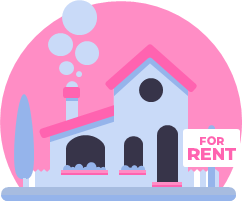




</span> 

## BY <span style="color:purple">Shane.D</span> Batch:2021-6832

## <span style="color:blue">Problem Statement</span>

We have to predict the <span style="color:red">price of the real estate properties properties based on their total square feet area , number of bathrooms and number of bedrooms.</span>

## <span style="color:blue">Dataset description</span>

This dataset has been taken from <span style="color:red">kaggle.com</span>

This dataset contains <span style="color:red">13321</span> rows and <span style="color:red">9</span> columns

The following are the  of <span style="color:red">detailed description</span> the variables 

1.<span style="color:green">area_type</span>- Describes about the saleable area of the property

2.<span style="color:green">availability</span>- Tells when the property is ready to move in

3.<span style="color:green">location</span>- Tells the location of our property

4.<span style="color:green">size</span>- Tells the number of bhk 

5.<span style="color:green">society</span>- Tells what type of society the property is in

6.<span style="color:green">total_sqft</span>- Gives the total square feet area

7.<span style="color:green">bath</span>-Tells the number of bathrooms

8.<span style="color:green">balcony</span>-Tells the number of balcony

9.<span style="color:green">price</span>-This is our <span style="color:red">target variable</span> which we have to predict.
We have to take our price as lakhs in Indian rupees

## <span style="color:blue">Importing necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  <span style="color:blue">Data loading</span>

 <span style="color:red">importing the file</span>

In [2]:
df=pd.read_csv("C:\\Users\\aaron\\Downloads\\Real estate price prediction\\real estate.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


 <span style="color:red">Checking the shape of our dataset</span>

In [3]:
df.shape

(13320, 9)

 <span style="color:red">Grouping the area type and getting the count of each area type</span>

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

 <span style="color:red">Dropping features that are not required to build our model</span>

In [5]:
df=df.drop(['area_type','society','balcony','availability'],axis='columns')
df.head() 

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## <span style="color:blue"> Data cleaning</span>

 <span style="color:red">Checking the null values</span>

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

 <span style="color:red">we are dropping the null values</span>

In [7]:
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## <span style="color:blue"> Feature engineering</span>

 <span style="color:red">Creating additional columns from existing colums to make it less complicated</span>

 <span style="color:red">Checking the unique values in size column</span>

In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<span style="color:red"> we noticed that the values in size column are incosistent
 so we are creating a new column "bhk" with int datatype of size column </span>

 <span style="color:red">Here we create a lambda function to split the size column and take the first value</span>

In [9]:
df['bhk']=df['size'].apply(lambda x: int(x.split(" ")[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


<span style="color:red">Checking the unique values in bhk column </span>

In [10]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

 <span style="color:red">Checking the unique values in total_sqft column</span>

In [11]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

 <span style="color:red">Here we noticed some values are given as a range.
so we create a function to extract only the float values</span>

In [12]:
def isfloat(x):
    try:
        float(x) #to convert the values to float
    except:
        return False #if its not a valid number it will return false
    return True #else it will return true

 <span style="color:red">Here we are using ~ "negate operator" to get the values which are false in the data</span>

In [13]:
df[~df['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


 <span style="color:red">Here we create a function to convert those ranges to its mean</span>

In [14]:
def convt(x):
    spt=x.split(" - ")# we are splitting the numbers at -
    if len(spt) ==2: #to get only the ranges and exclude the string values
        return(float(spt[0])+float(spt[1]))/2 #to find the mean
    try:
        return float(x) #if its not a range return a float value
    except:
        return None #if its not a valid value return nothing

 <span style="color:red">Testing the function we created</span>

In [15]:
convt('2354') #converts the number to float

2354.0

In [16]:
convt('500 - 1000') #converts the range to its mean

750.0

In [17]:
convt('34.46Sq. Meter') #returns nothing if the value is not valid

 <span style="color:red">We are applying the function we have created to the dataset</span>

In [18]:
df['total_sqft']=df['total_sqft'].apply(convt)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


 <span style="color:red">Now we have modified our total_sqft</span>

In [19]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

 <span style="color:red">We are cross verifying the output of our function</span>

In [20]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

 <span style="color:red">In the index no.30 we had the sqft value as 2100-2850</span>

In [21]:
(2100+2850)/2 #checking the mean value for verifying

2475.0

 <span style="color:red">We are creating a new column "Price_per_sqft" with price and total_sqft column</span>

In [22]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## <span style="color:blue"> Exploratory Data Analysis</span>

  <span style="color:red">Since we have a lot of values it is complicated to perform eda,so we are filtering some data</span>

In [23]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
len(df.location)

13246

  <span style="color:red">We will filter the top three locations and perform eda</span>

In [25]:
df.location.value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

  <span style="color:red">We will store it in a new dataframe</span>

In [26]:
dfw=df[df.location=='Whitefield']
dfs=df[df.location=='Sarjapur  Road']
dfe=df[df.location=='Electronic City']

In [27]:
print("The shape dfw dataframe is:",dfw.shape)
print("The shape dfs dataframe is:",dfs.shape)
print("The shape dfe dataframe is:",dfe.shape)

The shape dfw dataframe is: (534, 7)
The shape dfs dataframe is: (392, 7)
The shape dfe dataframe is: (302, 7)


 <span style="color:red">Now we will plot a line plot between price and sqft with those three datasets we have filtered</span>

<function matplotlib.pyplot.show(close=None, block=None)>

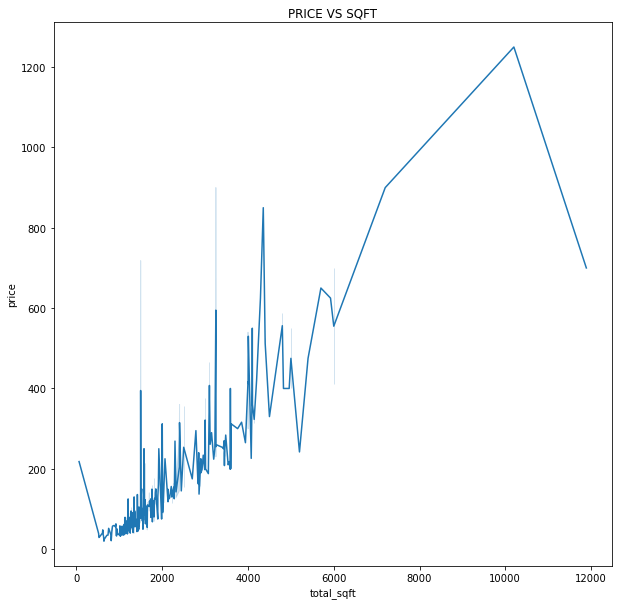

In [28]:
plt.figure(figsize=(10,10))
sns.lineplot(x="total_sqft",y="price",data=dfw)
plt.title("PRICE VS SQFT")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

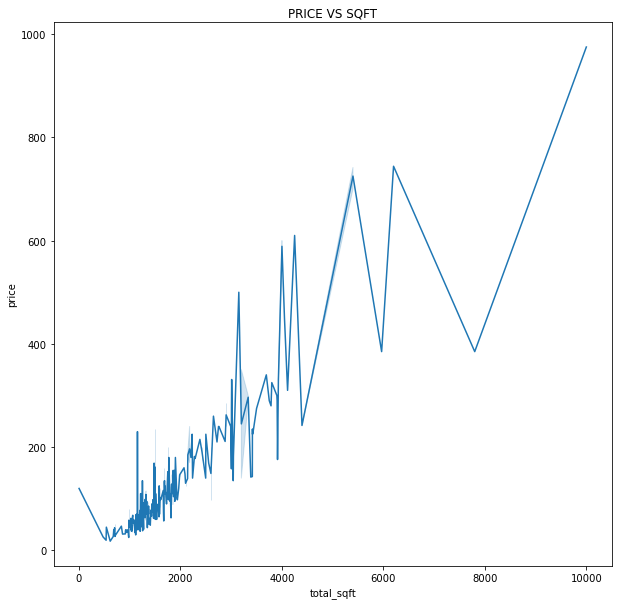

In [29]:
plt.figure(figsize=(10,10))
sns.lineplot(x="total_sqft",y="price",data=dfs)
plt.title("PRICE VS SQFT")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

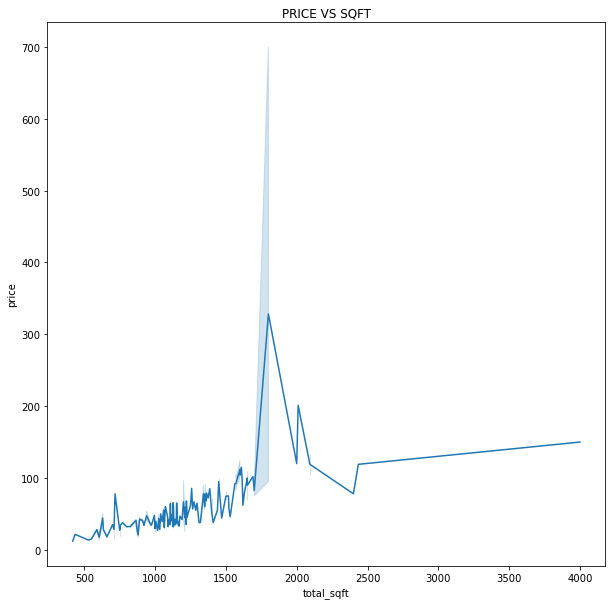

In [30]:
plt.figure(figsize=(10,10))
sns.lineplot(x="total_sqft",y="price",data=dfe)
plt.title("PRICE VS SQFT")
plt.show

From the above graph we can infer that the price increase with increase in total_sqft but there are some value which have a lower value despit having a larger sqft area

Now we will plot a line plot between price and bath

<function matplotlib.pyplot.show(close=None, block=None)>

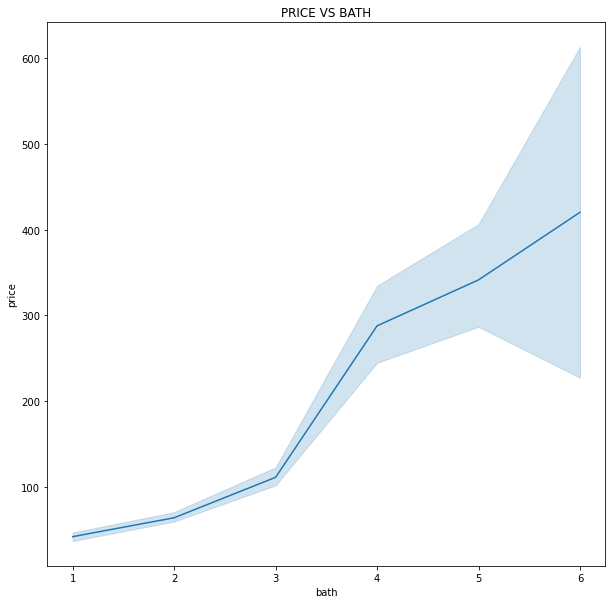

In [31]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bath",y="price",data=dfw)
plt.title("PRICE VS BATH")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

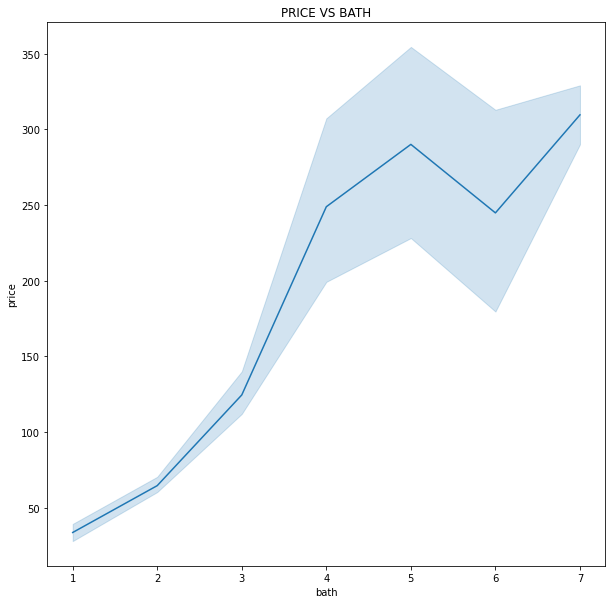

In [32]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bath",y="price",data=dfs)
plt.title("PRICE VS BATH")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

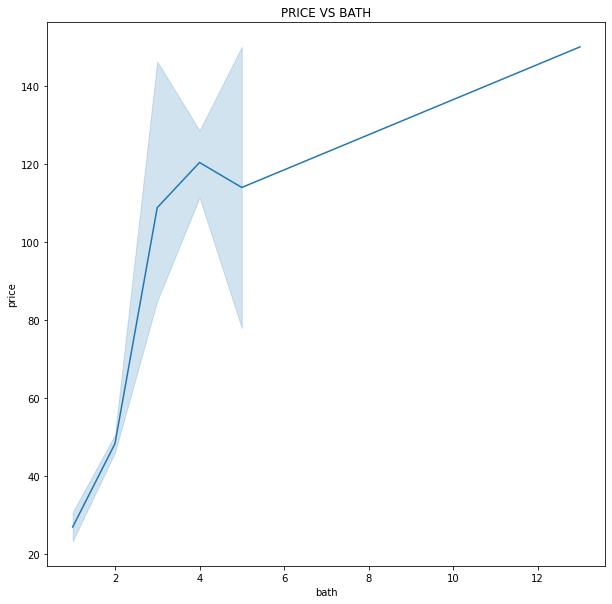

In [33]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bath",y="price",data=dfe)
plt.title("PRICE VS BATH")
plt.show

Now we will plot a line plot between price and bhk

<function matplotlib.pyplot.show(close=None, block=None)>

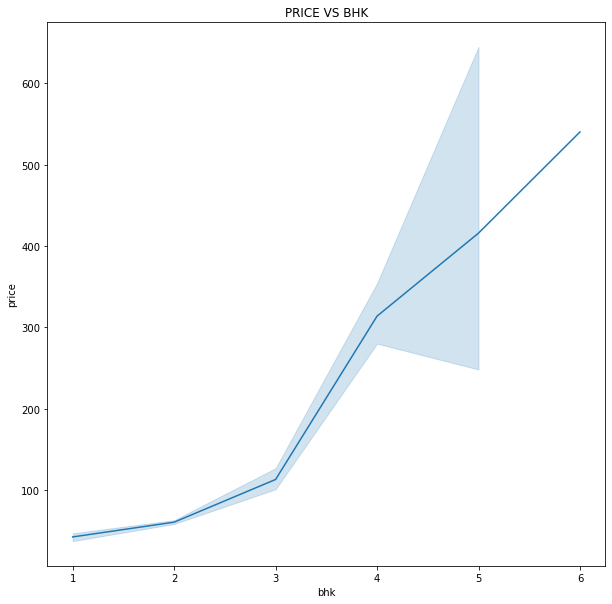

In [34]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bhk",y="price",data=dfw)
plt.title("PRICE VS BHK")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

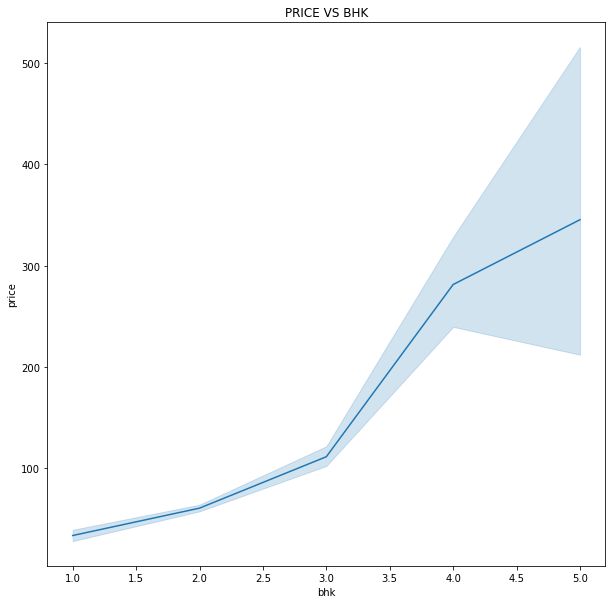

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bhk",y="price",data=dfs)
plt.title("PRICE VS BHK")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

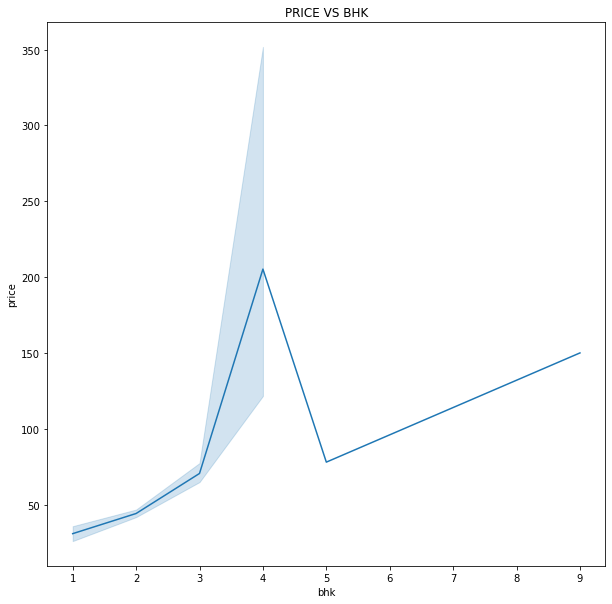

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(x="bhk",y="price",data=dfe)
plt.title("PRICE VS BHK")
plt.show

from the above six graphs we can clearly see that there is a constant increase in price with increase in number of bedrooms and bathrooms

Here we are plotting a histogram for the number of bedrooms in each location

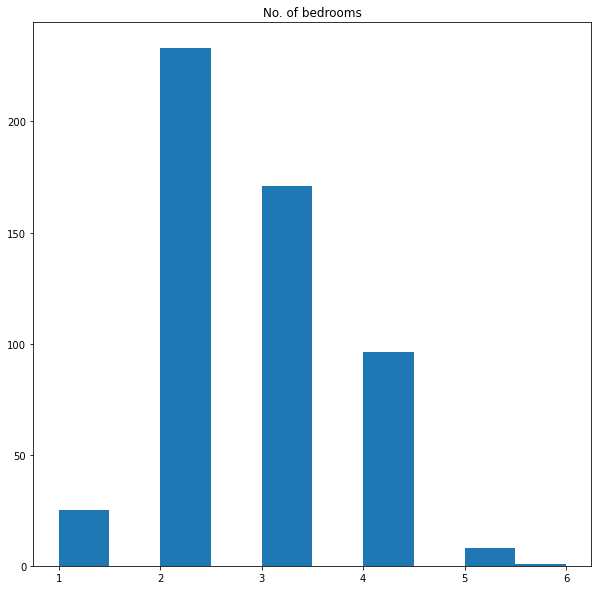

In [37]:
plt.figure(figsize=(10,10))
plt.hist(dfw.bhk)
plt.title("No. of bedrooms")
plt.show()

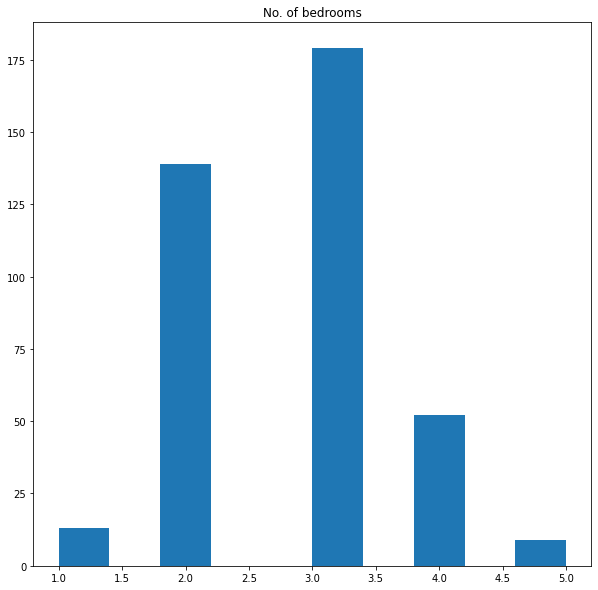

In [38]:
plt.figure(figsize=(10,10))
plt.hist(dfs.bhk)
plt.title("No. of bedrooms")
plt.show()

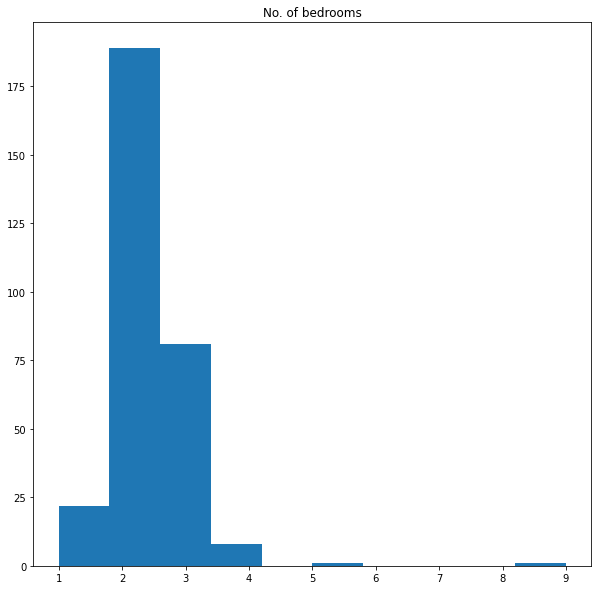

In [39]:
plt.figure(figsize=(10,10))
plt.hist(dfe.bhk)
plt.title("No. of bedrooms")
plt.show()

Here we can see that the price is correlated with the total_sqft,bath and bhk.
We are not considering the price_per_sqft column because it is derived from total_sqft and price column.

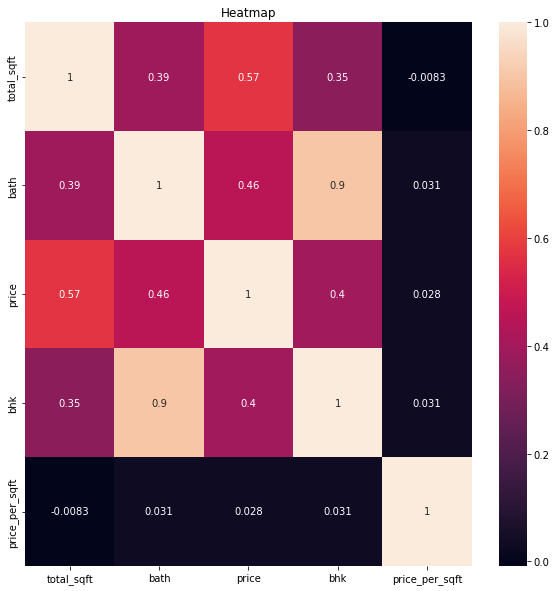

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")
plt.show()

##  <span style="color:blue"> Dimensionality reduction</span>

 <span style="color:red">Here we are reducing the number of random variables in a problem by obtaining a set of principal variables</span>

 <span style="color:red">Checking the unique values in location</span>

In [41]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

<span style="color:red">There are many locations so we are using len function to get the length </span>

In [42]:
len(df.location.unique())

1304

 <span style="color:red">We are using the strip function in location column to clear the extra spaces</span>

In [43]:
df.location=df.location.apply(lambda x:x.strip())

 <span style="color:red">We are grouping the locations and getting the count of each location in decending order</span>

In [44]:
locnum=df.groupby('location')['location'].agg('count').sort_values(ascending= False)
locnum

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [45]:
locnum.values.sum() #there are a total of 13246 values

13246

 <span style="color:red">Since there are 13246 locations we are going to group the location which have count less than 10 to other</span>

In [46]:
locnum_less_than_10=locnum[locnum<=10]

In [47]:
locnum_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [48]:
len(df.location.unique())

1293

 <span style="color:red"><span style="color:red"></span></span>

In [49]:
df.location=df.location.apply(lambda x: 'other' if x in locnum_less_than_10 else x)

 <span style="color:red">Now we have reduced the number of unique values from 1293 to 242</span>

In [50]:
len(df.location.unique())

242

 <span style="color:red">Here we can notice that in 9th row we got other</span>

In [51]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


##  <span style="color:blue">Outlier removal</span>

 <span style="color:red">First we will remove the outliers by basic logic and then we will use standard deviation to remove the outliers</span>

 <span style="color:red">We are applying a basic logic here that is a bedroom should have atleast 300 sqft</span>

In [52]:
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


<span style="color:red">We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are data errors and can be removed </span>

In [53]:
df=df[~(df.total_sqft/df.bhk<300)] #we are dropping those outliers

In [54]:
df.shape #after dropping the outliers by logic we are left with 12502 rows

(12502, 7)

 <span style="color:red">Here we are removing outliers with standard deviation and mean</span>

 <span style="color:red">First we will get a five point summary using describe function</span>

In [55]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

 <span style="color:red">We are creating a function to remove the outliers</span>

In [56]:
def rem_out(df):#here we are passing our dataframe
    df_out = pd.DataFrame()#create a output dataframe
    for key, subdf in df.groupby('location'):#key and the sub dataframe in our df grouped by location
        m = np.mean(subdf.price_per_sqft)#mean function
        sd = np.std(subdf.price_per_sqft)#standard deviation function
        #create a variable with values greater than difference of mean and sd with values less than sum of mean and sd
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        #now we concatenate the dfs into df_out
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

  <span style="color:red">Passing our dataframe in this function</span>

In [57]:
df=rem_out(df)

In [58]:
df.shape #after dropping the outliers by Std. deviation & mean we are left with 10241 rows

(10241, 7)

 <span style="color:red">Here we are creating a function to plot the scatter plot</span>

In [59]:
def plot_scatter_chart(df,location):#passing the dataframe and location
    bhk2 = df[(df.location==location) & (df.bhk==2)]#for 2bhk
    bhk3 = df[(df.location==location) & (df.bhk==3)]#for 3bhk
    matplotlib.rcParams['figure.figsize'] = (15,10)#assigning the figsize
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in Lakhs)")
    plt.title(location)
    plt.legend()

 <span style="color:red">We can notice that the price of 3bhk is less than 2bhk</span>

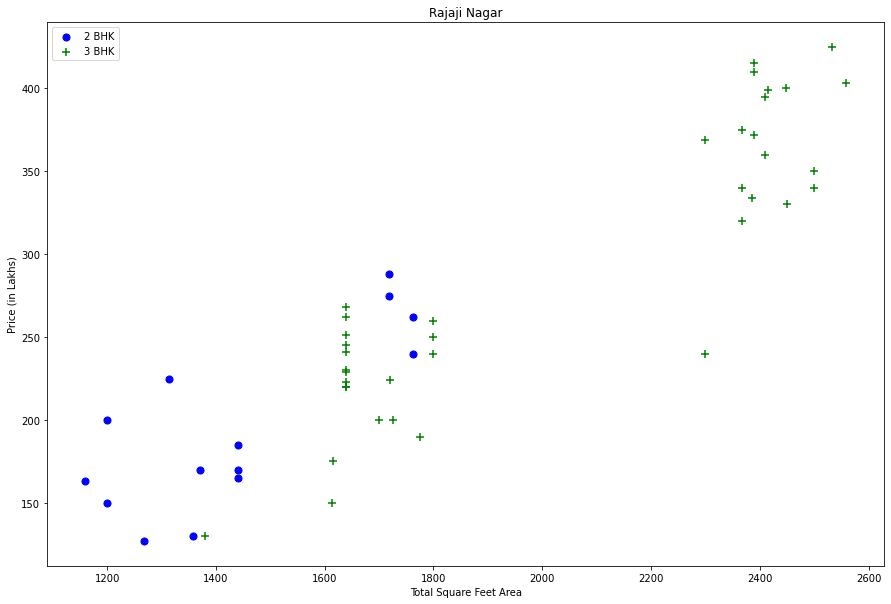

In [60]:
plot_scatter_chart(df,'Rajaji Nagar')

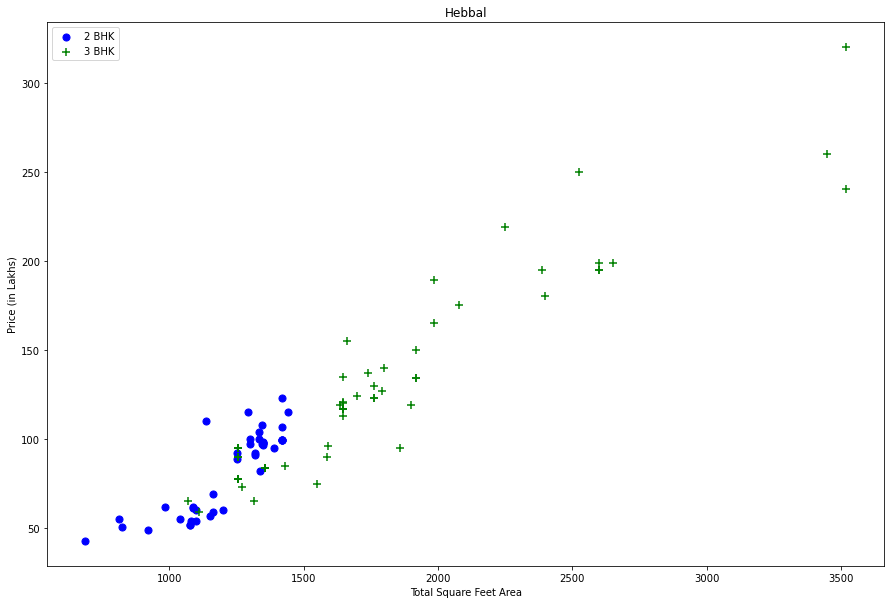

In [61]:
plot_scatter_chart(df,'Hebbal')

 <span style="color:red">Now we create a function to remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</span>

In [62]:
def remove_bhk_outliers(df):#passing our dataframe
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):#we are grouping the df by location
        bhk_stats = {} 
        for bhk, bhk_df in location_df.groupby('bhk'):#after we group the df by location we group it again by bhk
            #we will build a dictionary
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        #here we are checking whether the price of say 3 bhk is less than 2 bhk,so we create a loop to check all bhks    
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)#this will help to check bhk less than the passed value
            if stats and stats['count']>5:
                #we are ecluding the values whose price is less than the mean of the previous bhk
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

 <span style="color:red">We are passing the function in out dataset</span>

In [63]:
df=remove_bhk_outliers(df)

In [64]:
df.shape #we have reduced the outliers and we have reduced our df shape from 10241 to 7329

(7329, 7)

 <span style="color:red">Here we can see that the values are cleared,but still some values are present
but those are hard to remove so we are neglecting that</span>

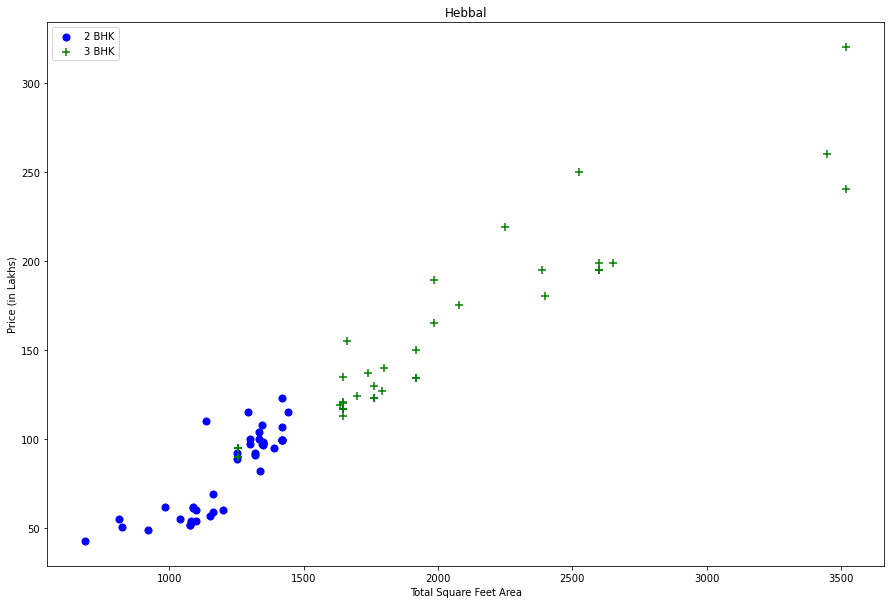

In [65]:
plot_scatter_chart(df,'Hebbal')

<span style="color:red">We can see a normal distribution of our data between 0 to 10000.When we plot a histogram for the count of price per square feet </span>

Text(0, 0.5, 'Count')

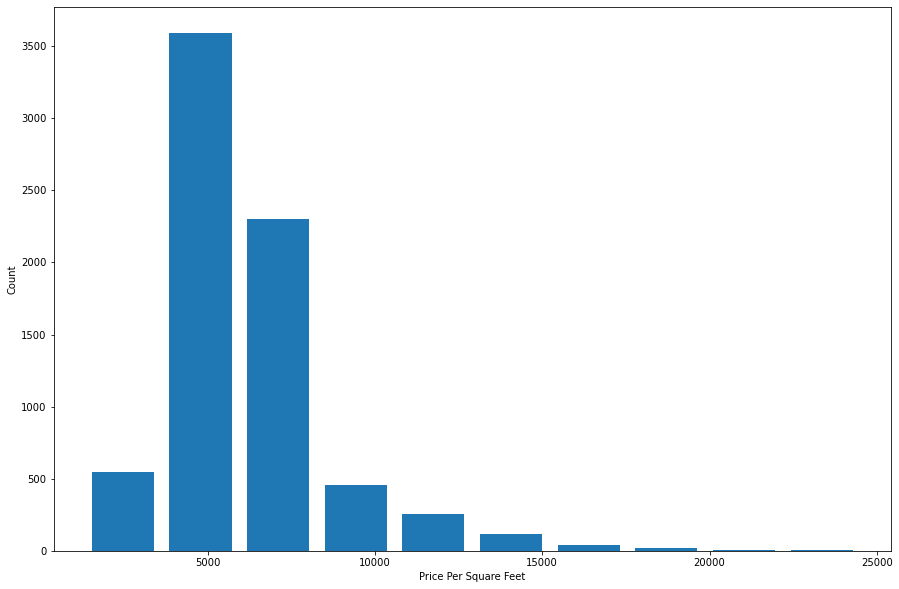

In [66]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

 <span style="color:red">We will check the unique values in bath column</span>

In [67]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

 <span style="color:red">We are checking the number of bathrooms greater than 10</span>

In [68]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


 <span style="color:red">In the above table we can see that 16 bathrooms for 10000sqft and 12 bathrooms for 4000 sqft which is clearly an error,
also consider the number of bedrooms</span>

 <span style="color:red">Here we are plotting a histogram for the count of bathroom</span>

Text(0, 0.5, 'Count')

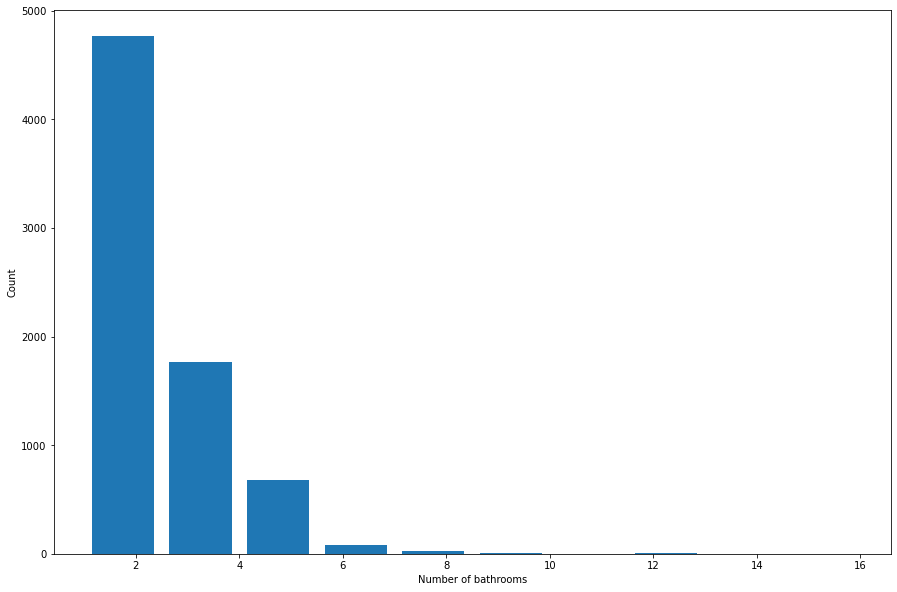

In [69]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

 <span style="color:red">Here we are considering the no of bathrooms 2 greater than no of bedrooms as outliers</span>

In [70]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


 <span style="color:red">We are dropping those values with more number of bathrooms</span>

In [71]:
df2=df[df.bath<df.bhk+2]

In [72]:
df2.shape #we have reduced the outliers and we have reduced our df shape from 7329 to 7251

(7251, 7)

In [73]:
df=df2 #keeping everydataset in same name

 <span style="color:red">Dropping some features which are not necessary</span>

In [74]:
df=df.drop(['size','price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


 <span style="color:red">We are creating a column for each of the location using pd.dummies</span>

In [75]:
dummies=pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <span style="color:red">We are concatenating the df and dummies,also we are dropping the "other" column here</span>

In [76]:
df=pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <span style="color:red">We will also drop the location column since we have created columns for each location seperately</span>

In [77]:
df=df.drop('location',axis='columns')
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  <span style="color:blue">Building our model</span>

 <span style="color:red">Assigning the independent variables to x</span>

In [78]:
x=df.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <span style="color:red">Assigning the dependent variables to y</span>

In [79]:
y=df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

 <span style="color:red">Importing train test split to split our dataset</span>

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

<span style="color:red">We are creating a linear regression model</span>

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
print('The accuracy is: ',lr.score(x_test,y_test)*100)

The accuracy is:  84.52277697874312


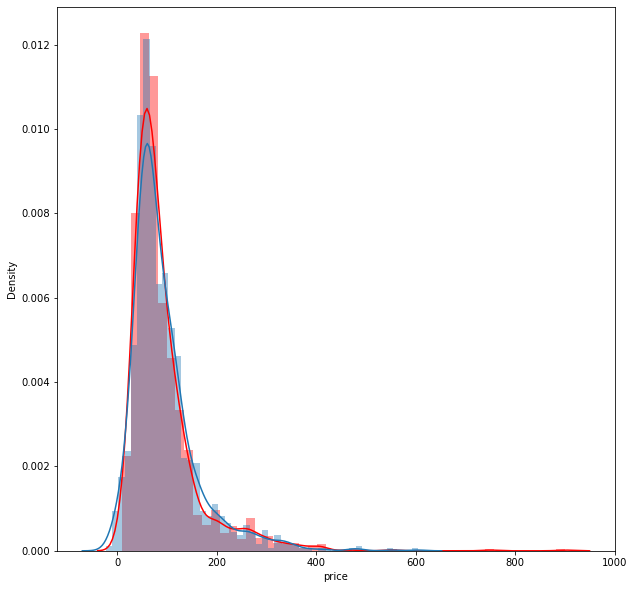

In [82]:
plt.figure(figsize=(10,10))
sns.distplot(y_test,color= 'r')
sns.distplot(prediction)
plt.show()

Here we can see that the <span style="color:red">red color represents true values</span> and  <span style="color:blue">blue color represents predicted value</span>

 <span style="color:red">Here we use K Fold cross validation to measure accuracy of our LinearRegression model</span>

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313])

 <span style="color:red">We are getting an accuracy of over 80% but we can also check other models</span>

 <span style="color:red">To find best model we are using GridSearchCV</span>

In [84]:
from sklearn.model_selection import GridSearchCV #importing gridsearch 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):#we create a function to use gridsearch
#here we pass different models with different hyperparameters
    alg = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for alg_name, config in alg.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': alg_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687434,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723068,"{'criterion': 'mse', 'splitter': 'best'}"


 <span style="color:red">Based on the result we can say the Linear regression has best scores,so we will use that</span>

 <span style="color:red">Here we create a function to predict the price</span>

In [85]:
def predict_price(location,sqft,bath,bhk):#we are passing these values  
    loc_index = np.where(x.columns==location)[0][0] #gets the index of the particular location

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return lr.predict([z])[0]

In [86]:
x.columns #column in x

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

 <span style="color:red">Now we will predict some prices</span>

In [87]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.49904677179237

In [88]:
predict_price('1st Phase JP Nagar',1000,3,3)

86.80519395205847

In [89]:
predict_price('Indira Nagar',1000,2,2)

181.2781548400685

In [90]:
predict_price('Indira Nagar',1000,3,3)

184.58430202033463

In [91]:
predict_price('Whitefield',2000,3,3)

136.07990920245462